<a href="https://colab.research.google.com/github/dominiksakic/deeplearning00/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_label), (test_images, test_label) = mnist.load_data()

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_label, epochs=5, batch_size=128)

test_digits = test_images[:10]
predictions = model.predict(test_digits)
predictions[0]

test_loss, test_acc = model.evaluate(test_images, test_label)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8738 - loss: 0.4420
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9643 - loss: 0.1196
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9780 - loss: 0.0756
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9844 - loss: 0.0519
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9892 - loss: 0.0369
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0784


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the data
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)

x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shapes
print(f"Train set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

Train set: (48000, 28, 28, 1), (48000, 10)
Validation set: (12000, 28, 28, 1), (12000, 10)
Test set: (10000, 28, 28, 1), (10000, 10)


In [28]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [36]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8587 - loss: 0.4483 - val_accuracy: 0.9726 - val_loss: 0.0907
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9773 - loss: 0.0740 - val_accuracy: 0.9786 - val_loss: 0.0706
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9846 - loss: 0.0499 - val_accuracy: 0.9829 - val_loss: 0.0587
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9851 - val_loss: 0.0538
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 91s 38ms/step - accuracy: 0.9918 - loss: 0.0266 - val_accuracy: 0.9854 - val_loss: 0.0535
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9869 - val_loss: 0.0528
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 91s 40ms/step - accuracy: 0.9945 - loss: 0.0193 - val_accuracy: 0.9852 - val_loss: 0.0595
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 38ms/step - accuracy: 0.9963 -

<Figure size 640x480 with 0 Axes>

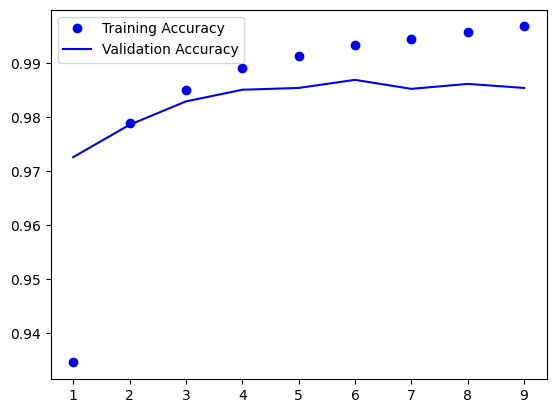

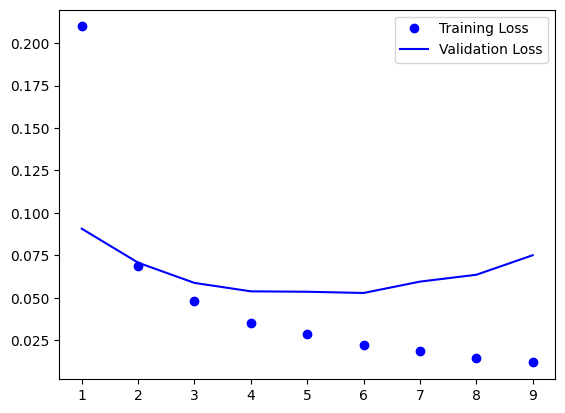

<Figure size 640x480 with 0 Axes>

In [45]:
 import matplotlib.pyplot as plt

 accuracy = history.history["accuracy"]
 val_accuracy = history.history["val_accuracy"]
 loss = history.history["loss"]
 val_loss = history.history["val_loss"]

 epochs = range(1, len(accuracy) + 1)
 plt.plot(epochs, accuracy, "bo", label= "Training Accuracy")
 plt.plot(epochs, val_accuracy, "b", label= "Validation Accuracy")
 plt.legend()
 plt.figure()

 plt.plot(epochs, loss, "bo", label="Training Loss")
 plt.plot(epochs, val_loss, "b", label="Validation Loss")
 plt.legend()
 plt.figure()

In [47]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc: .3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9844 - loss: 0.0599
Test accuracy:  0.988
